### チャレンジ1

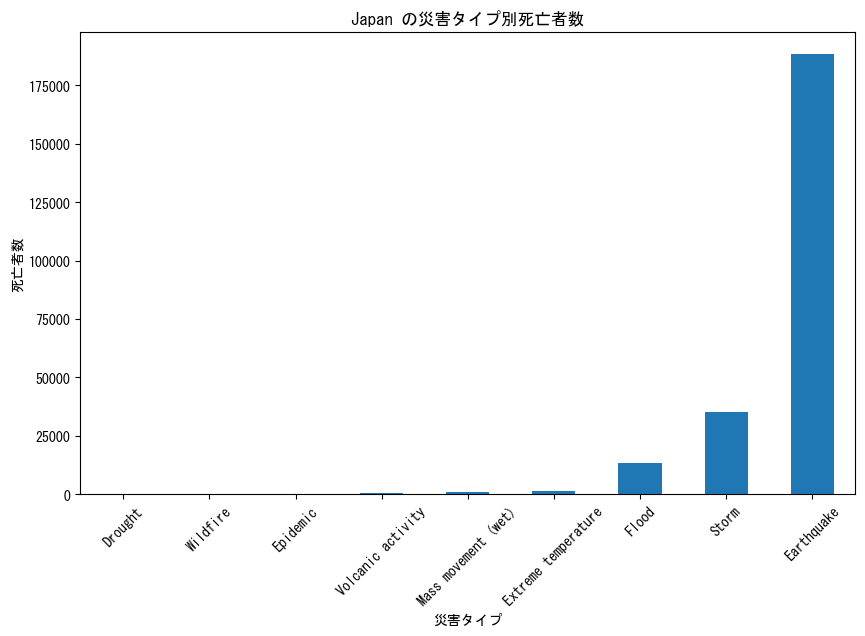

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'   # または 'Yu Gothic', 'Meiryo'
plt.rcParams['axes.unicode_minus'] = False  # マイナス符号の文字化け防止

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("emdat.csv")
df.columns
def plot_country_deaths(df, country):
    # 指定した国だけ抽出
    data = df[df["Country"] == country]

    # 災害タイプごとに死亡者を集計
    grouped = data.groupby("Disaster Type")["Total Deaths"].sum().sort_values()

    # グラフ描画
    plt.figure(figsize=(10, 6))
    grouped.plot(kind="bar")
    plt.title(f"{country} の災害タイプ別死亡者数")
    plt.xlabel("災害タイプ")
    plt.ylabel("死亡者数")
    plt.xticks(rotation=45)
    plt.show()
plot_country_deaths(df, "Japan")



### チャレンジ2

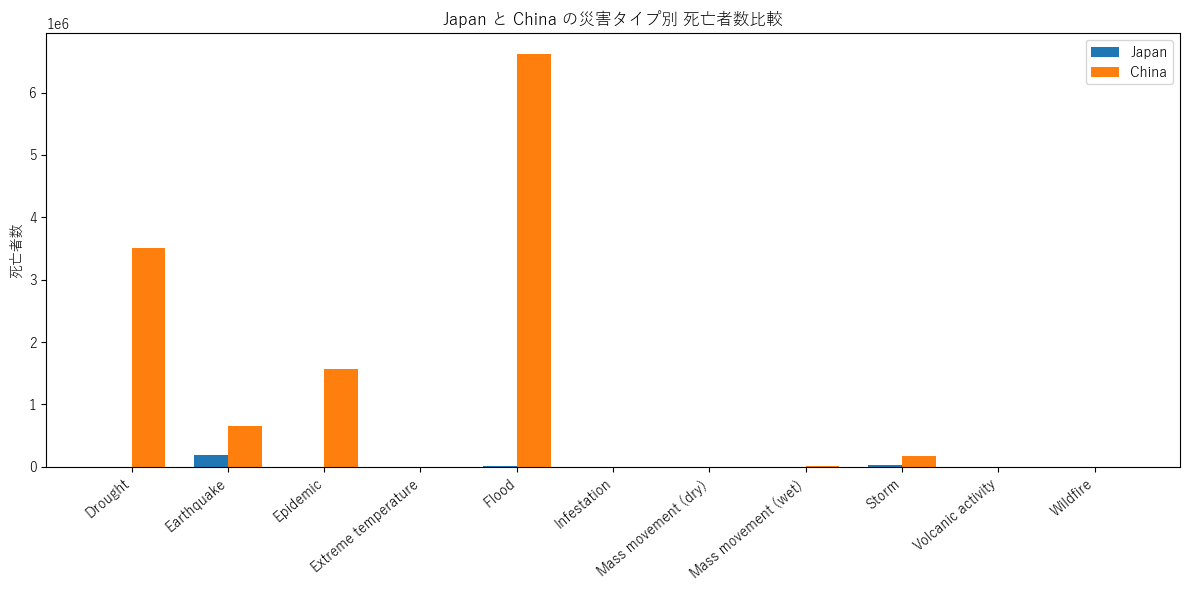

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ▼ Windows 標準日本語フォント
plt.rcParams['font.family'] = 'Yu Gothic'

df = pd.read_csv("emdat.csv")

def compare_two_countries(df, country1, country2):
    df1 = df[df["Country"] == country1]
    df2 = df[df["Country"] == country2]

    sum1 = df1.groupby("Disaster Type")["Total Deaths"].sum()
    sum2 = df2.groupby("Disaster Type")["Total Deaths"].sum()

    types = sorted(set(sum1.index) | set(sum2.index))
    deaths1 = [sum1.get(t, 0) for t in types]
    deaths2 = [sum2.get(t, 0) for t in types]

    x = range(len(types))
    width = 0.35

    plt.figure(figsize=(12, 6))
    plt.bar([i - width/2 for i in x], deaths1, width=width, label=country1)
    plt.bar([i + width/2 for i in x], deaths2, width=width, label=country2)

    plt.xticks(x, types, rotation=40, ha='right')
    plt.ylabel("死亡者数")
    plt.title(f"{country1} と {country2} の災害タイプ別 死亡者数比較")
    plt.legend()
    plt.tight_layout()
    plt.show()

compare_two_countries(df, "Japan", "China")


### チャレンジ3

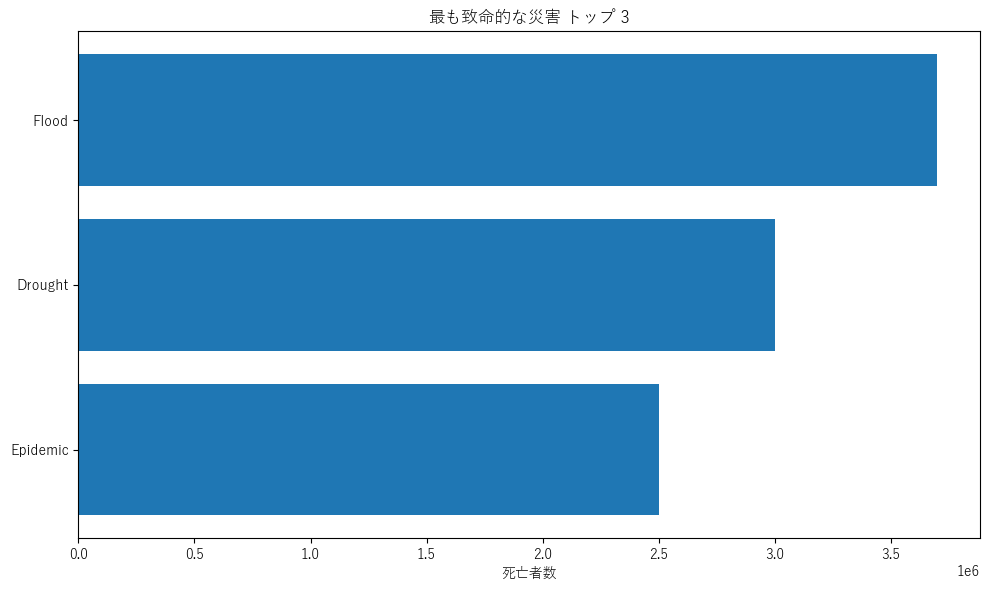

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# ▼ Windows標準フォントで文字化け防止
plt.rcParams['font.family'] = 'Yu Gothic'


# ▼ トップN災害を可視化する関数
def visualize_top_deadliest_disasters(df, N=3):
    # 1. 死亡者数でソート（降順）
    df_sorted = df.sort_values(by="Total Deaths", ascending=False)

    # 2. 上位 N 件を取得
    top_n = df_sorted.head(N)

    # 3. グラフ描画
    plt.figure(figsize=(10, 6))
    plt.barh(top_n["Disaster Type"], top_n["Total Deaths"])
    plt.xlabel("死亡者数")
    plt.title(f"最も致命的な災害 トップ {N}")
    plt.gca().invert_yaxis()  # 上位が上にくるように反転
    plt.tight_layout()
    plt.show()


# ▼ CSV読み込み
df = pd.read_csv("emdat.csv")

# ▼ 実行例：トップ5
visualize_top_deadliest_disasters(df, N=3)


### チャレンジ4

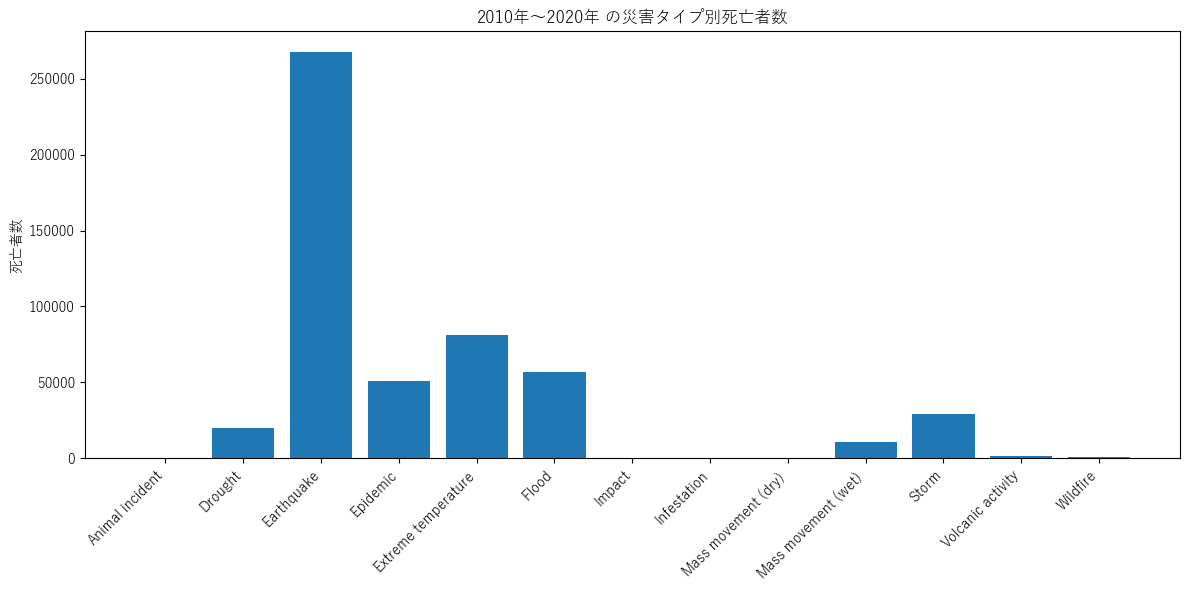

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ▼ Windows日本語フォント
plt.rcParams['font.family'] = 'Yu Gothic'


def visualize_deaths_in_year_range(df, start_year, end_year):
    # 1. 指定年範囲でフィルタ
    df_filtered = df[(df["Start Year"] >= start_year) & (df["Start Year"] <= end_year)]

    # 2. 災害タイプ別に死亡者数を合計
    deaths_by_type = df_filtered.groupby("Disaster Type")["Total Deaths"].sum()

    # 3. グラフ描画
    plt.figure(figsize=(12, 6))
    plt.bar(deaths_by_type.index, deaths_by_type.values)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("死亡者数")
    plt.title(f"{start_year}年〜{end_year}年 の災害タイプ別死亡者数")
    plt.tight_layout()
    plt.show()


# ▼ CSV読み込み
df = pd.read_csv("emdat.csv")

# ▼ 実行例：2010〜2020年
visualize_deaths_in_year_range(df, 2010, 2020)

### チャレンジ5

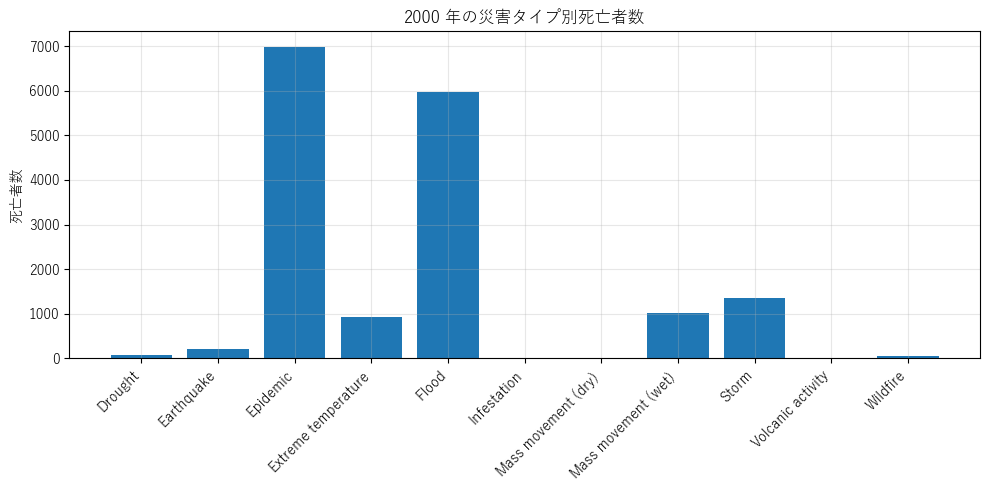

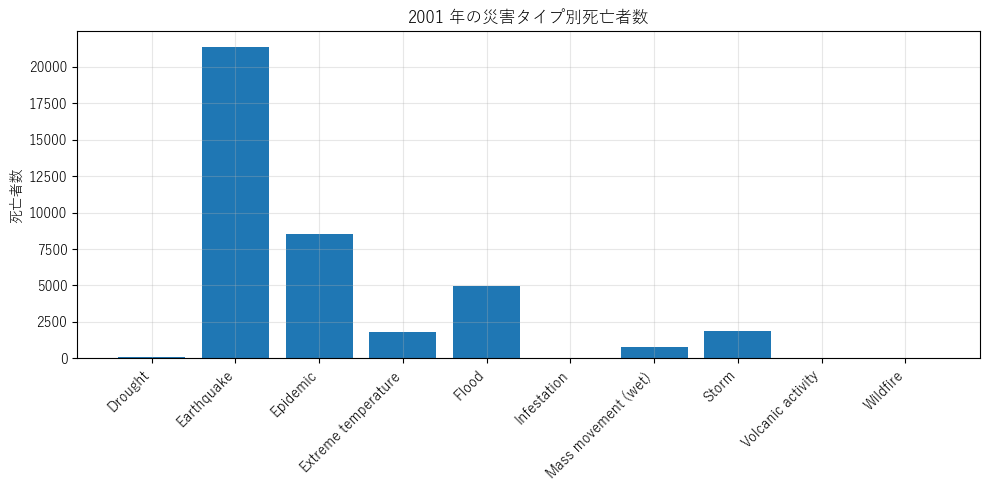

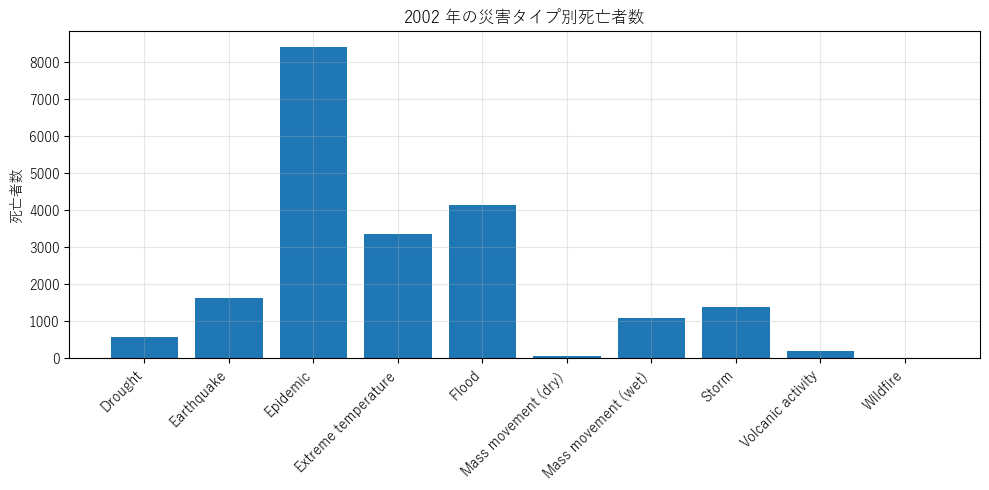

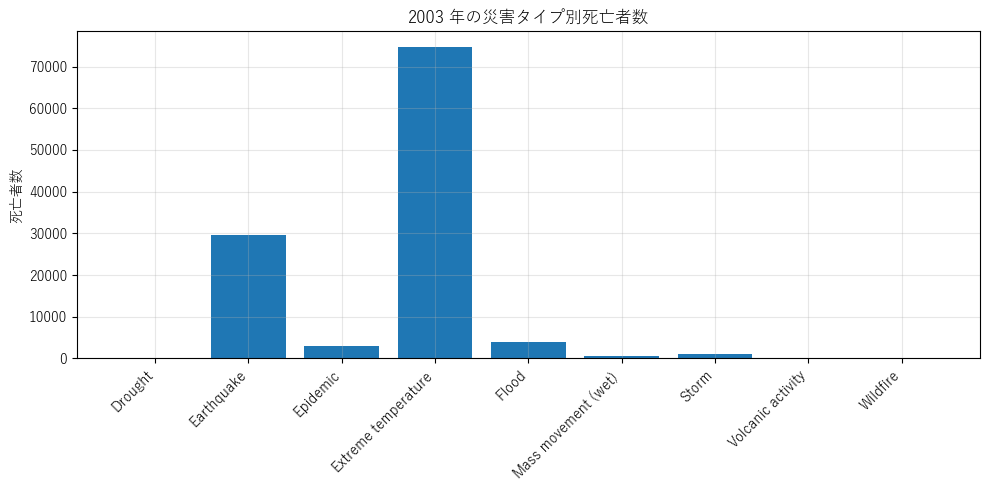

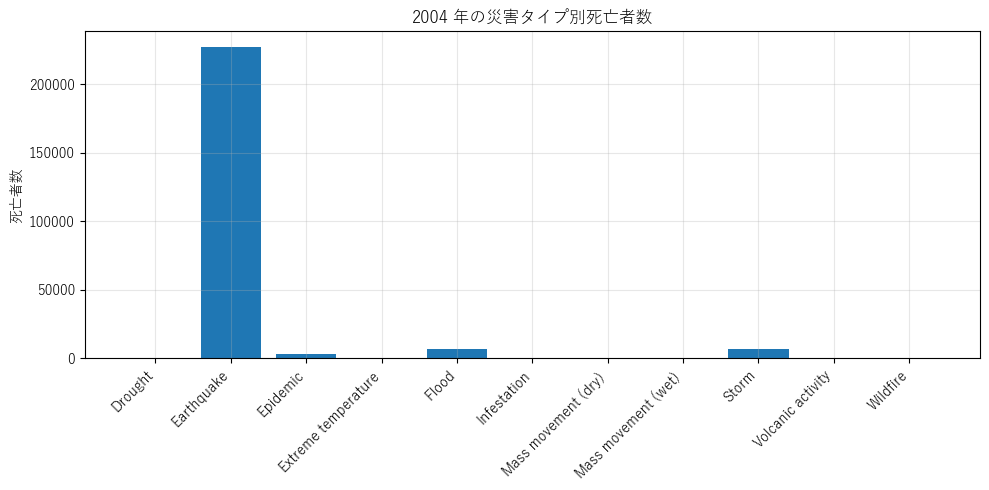

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ▼ Windowsフォント
plt.rcParams['font.family'] = 'Yu Gothic'

# ▼ CSV 読み込みと型変換
df = pd.read_csv("emdat.csv")
df["Start Year"] = pd.to_numeric(df["Start Year"], errors="coerce")
df["Total Deaths"] = pd.to_numeric(df["Total Deaths"], errors="coerce").fillna(0).astype(int)
df = df.dropna(subset=["Start Year"])
df["Start Year"] = df["Start Year"].astype(int)


# =====================================================
#   災害タイプ別（災害モード）
# =====================================================
def plot_disaster_type(df, year):
    df_y = df[df["Start Year"] == year]

    if df_y.empty:
        print(f"※ {year} 年のデータがありません")
        return

    deaths_by_type = df_y.groupby("Disaster Type")["Total Deaths"].sum()

    plt.figure(figsize=(10, 5))
    plt.bar(deaths_by_type.index, deaths_by_type.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{year} 年の災害タイプ別死亡者数")
    plt.ylabel("死亡者数")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# =====================================================
#   国別（国モード）→ 上位5か国のみ
# =====================================================
def plot_country_ranking(df, year):
    df_y = df[df["Start Year"] == year]

    if df_y.empty:
        print(f"※ {year} 年のデータがありません")
        return

    # ▼ 国別合計 → 大きい順にソート → 上位5位だけ
    deaths_by_country = df_y.groupby("Country")["Total Deaths"] \
                             .sum() \
                             .sort_values(ascending=False) \
                             .head(5)        # ★ 上位5位だけ

    plt.figure(figsize=(10, 6))
    plt.bar(deaths_by_country.index, deaths_by_country.values)
    plt.xticks(rotation=90)
    plt.title(f"{year} 年の国別死亡者数ランキング（上位5位）")
    plt.ylabel("死亡者数")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# =====================================================
#   入力した年から5年分を描く
# =====================================================
def plot_years(df, start_year, mode):
    for y in range(start_year, start_year + 5):
        if mode == "災害":
            plot_disaster_type(df, y)
        elif mode == "国":
            plot_country_ranking(df, y)


# =====================================================
#   ★ インプット
# =====================================================
mode = input("モードを入力してください（国 or 災害）: ")

if mode == "国":
    year = int(input("開始年を入力してください（例：2000）: "))
    plot_years(df, year, mode="国")

elif mode == "災害":
    year = int(input("開始年を入力してください（例：2000）: "))
    plot_years(df, year, mode="災害")

else:
    print("※ '国' または '災害' を入力してください")


2000〜2004年では、このデータでは災害による死亡者数が多い国としてインドが上位に入っている

📊 年ごとの死亡者数可視化（概要）

この Notebook では、国別または災害タイプ別に、指定した年から 5 年間の死亡者数を可視化した。
ユーザーが「国」または「災害」を選び、さらに開始年を入力することで、5 年分（例：2000〜2004年）のデータを連続して表示する。

また、国モードでは 死亡者数上位 5 か国のみ を表示し、可視化の見やすさを向上させている。

### ✔ 国モード

指定した年の死亡者数を 国別に集計

死亡者数上位 5 カ国のみ表示

次の 5 年間分（例：2000〜2004年）を連続表示

年ごとの比較を行いやすい

➤ 2000〜2004年：国別の傾向

2000〜2004年の期間では、このデータでは インドが災害による死亡者数で上位に位置している。
主に洪水や暴風雨などの気象災害が大きく影響していると考えられる。

可視化した 5 年間（例：2000〜2004 年）のデータを確認すると、
地震（Earthquake）・感染症の流行（Epidemic）・極端な気温（Extreme temperature） による死亡者数が、他の災害タイプと比べて相対的に多い年がいくつか見られた。


### ✔ 災害モード

指定した年の死亡者数を 災害タイプ別に表示（Flood, Earthquake, Storm など）

次の 5 年分を連続表示

災害タイプの分布を見るのに適している

地震は一度の災害で非常に多くの死者が出るケースが多く、
感染症の流行は広範囲に長期間影響し、
極端な気温は熱波や寒波など地域全体に深刻な影響を与えやすい。

これら 3 種の災害は、データの中でも特に 死亡者数が突出しやすい災害タイプ として確認された。